# Project - Loan default predictor



### Datasets Context

-  Here we have a dataset of customers with individual's details of their financial and living status that have or have not defaulted the loan from the bank. 

### Analysis Goal 

- Looking into the customer status what are the correlation on defaulting the loan
- Creating a prediction model based on the customer status, whether the person will default the loan or not 


### Audience 
- Providing insights to banks on what are the major influences of defaulting the load.
- The idea of this analysis is to help bank to make better decision making when authorizing loans and evaluating risk level using the predictive model.

### Tools and Libraries 
- Descriptive analysis will be used to examine the correlation between target variables and independents variable , using numpy and pandas and seaborn for data visualisation and make conclusions 
- Classification analysis will be used to make the predictive model using Xgboost model 


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from category_encoders import LeaveOneOutEncoder
from sklearn.metrics import accuracy_score,precision_score, classification_report,confusion_matrix 
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek

In [3]:
df_test = pd.read_csv(r"C:\Users\NITISH KUMAR G\Desktop\Projects\Loan_Prediction\Test Data.csv")
df_train = pd.read_csv(r"C:\Users\NITISH KUMAR G\Desktop\Projects\Loan_Prediction\Training Data.csv")

In [4]:
df_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
df_train.shape

(252000, 13)

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [8]:
df_test.shape

(28000, 12)

### Info regards the dataset
- 252000 rows and 13 columns 
- 5 Continous varialbes : Income , Age , Experience , Current_Job_years , Current_House_years
- 8 Category varialbes : ID , Marriage status ,house ownership,  car ownership , profession , city , state , Risk flag(target varialbe) 

### Cleaning the dataset 
- Dropping irrelavent columns : drop 'ID'
- Identify missing values  : no missing values
- Identify uniques values  : uniques counts looks normal







In [9]:
df_train = df_train.drop(columns = ['Id'])
df_test = df_test.drop(columns = ['ID'])

df_train_con = df_train[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]
df_train_cat = df_train[['Married/Single','House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']]
target =  df_train[['Risk_Flag']]

In [10]:
df_train.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [11]:
df_train_con.isnull().sum()

Income               0
Age                  0
Experience           0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64

In [12]:
for col in df_train_cat.columns:
    print(col , df_train_cat[col].nunique())

print(target.nunique())

Married/Single 2
House_Ownership 3
Car_Ownership 2
Profession 51
CITY 317
STATE 29
Risk_Flag    2
dtype: int64


### Desciptive Analysis into the dataset
- Description of continous variables , mean , median , distribution 
- Description of categorical variables : distributions(counts) , 
- Bivariate of each varialbe relationship to the target variable 

In [13]:
df_train_con.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000


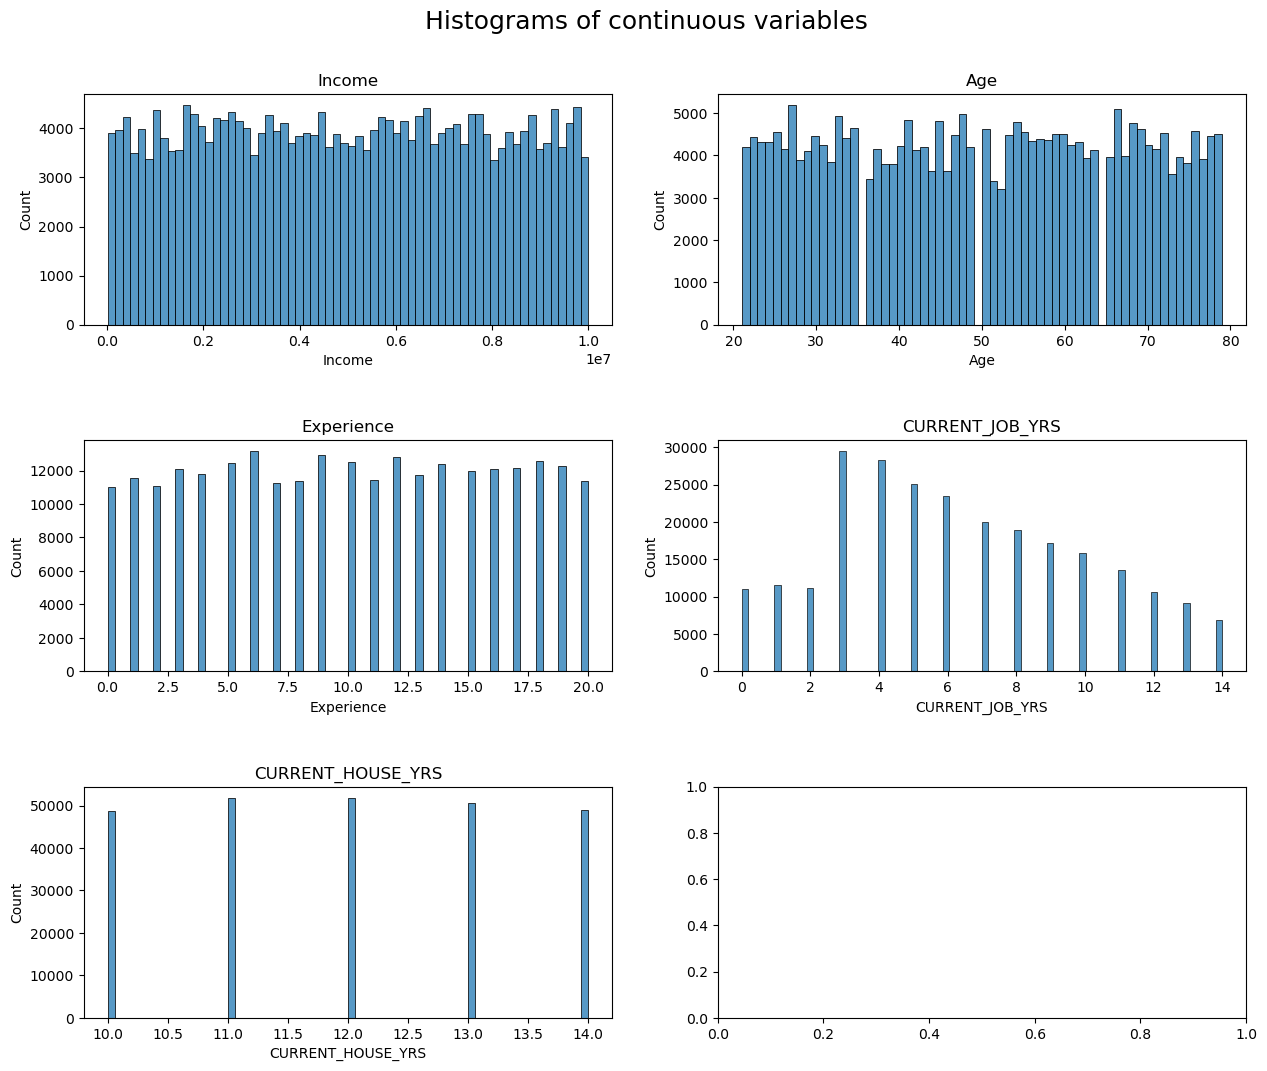

In [14]:
# Histograms of each continous variable 
# Boxplots of each variables 

# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Histograms of continuous variables", fontsize=18, y=0.95)

#Construct subplots 
for col , ax in zip(df_train_con.columns , axs.ravel()):
    sns.histplot(ax = ax ,data=df_train_con, x= col).set(title=col)

plt.show()

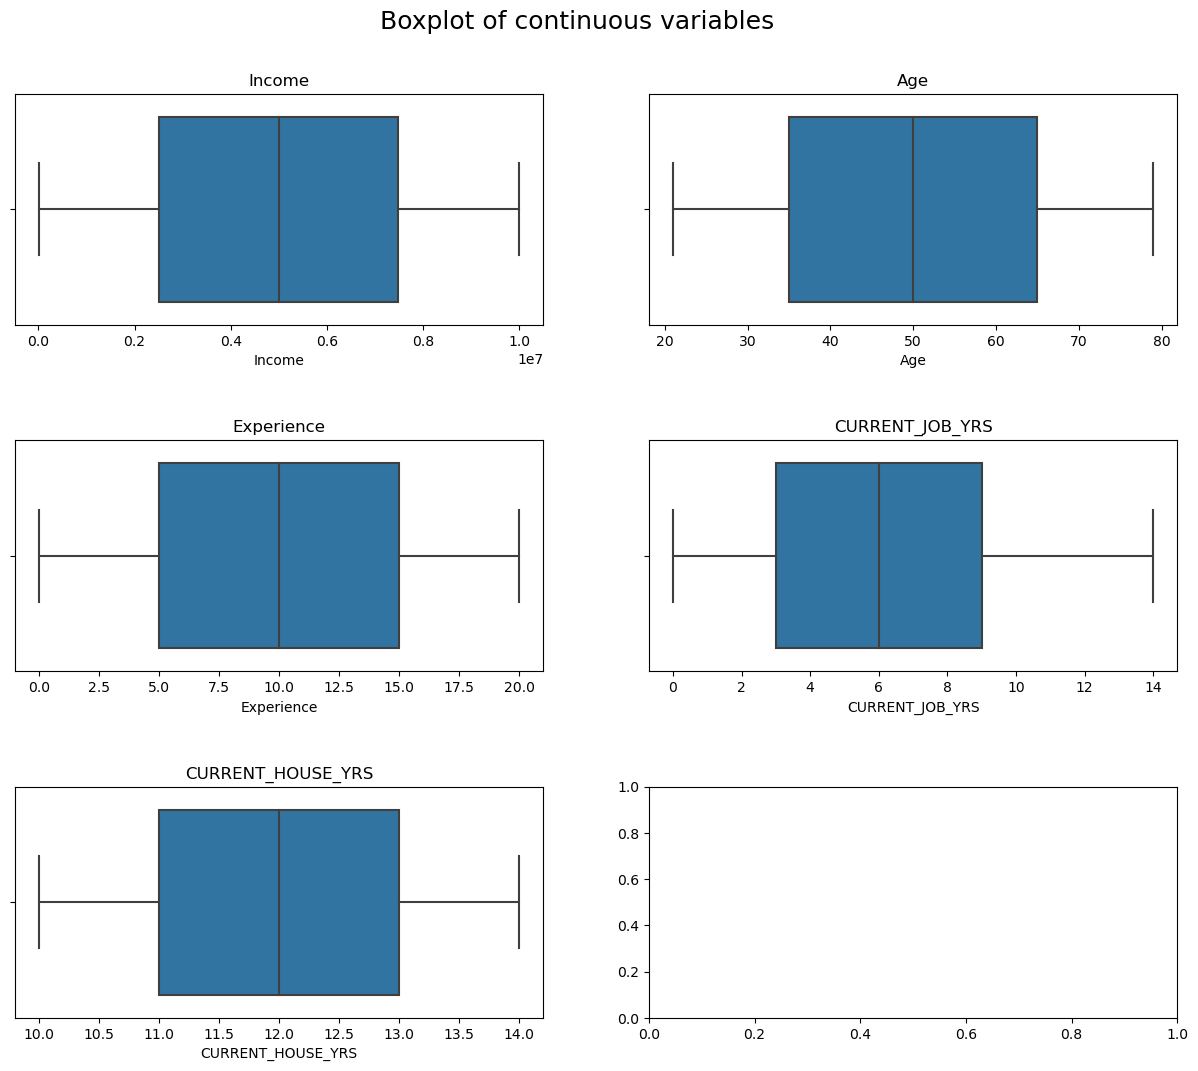

In [15]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Boxplot of continuous variables", fontsize=18, y=0.95)

for col , ax in zip(df_train_con.columns , axs.ravel()):
    sns.boxplot(ax = ax ,data=df_train_con, x= col).set(title=col)

plt.show()

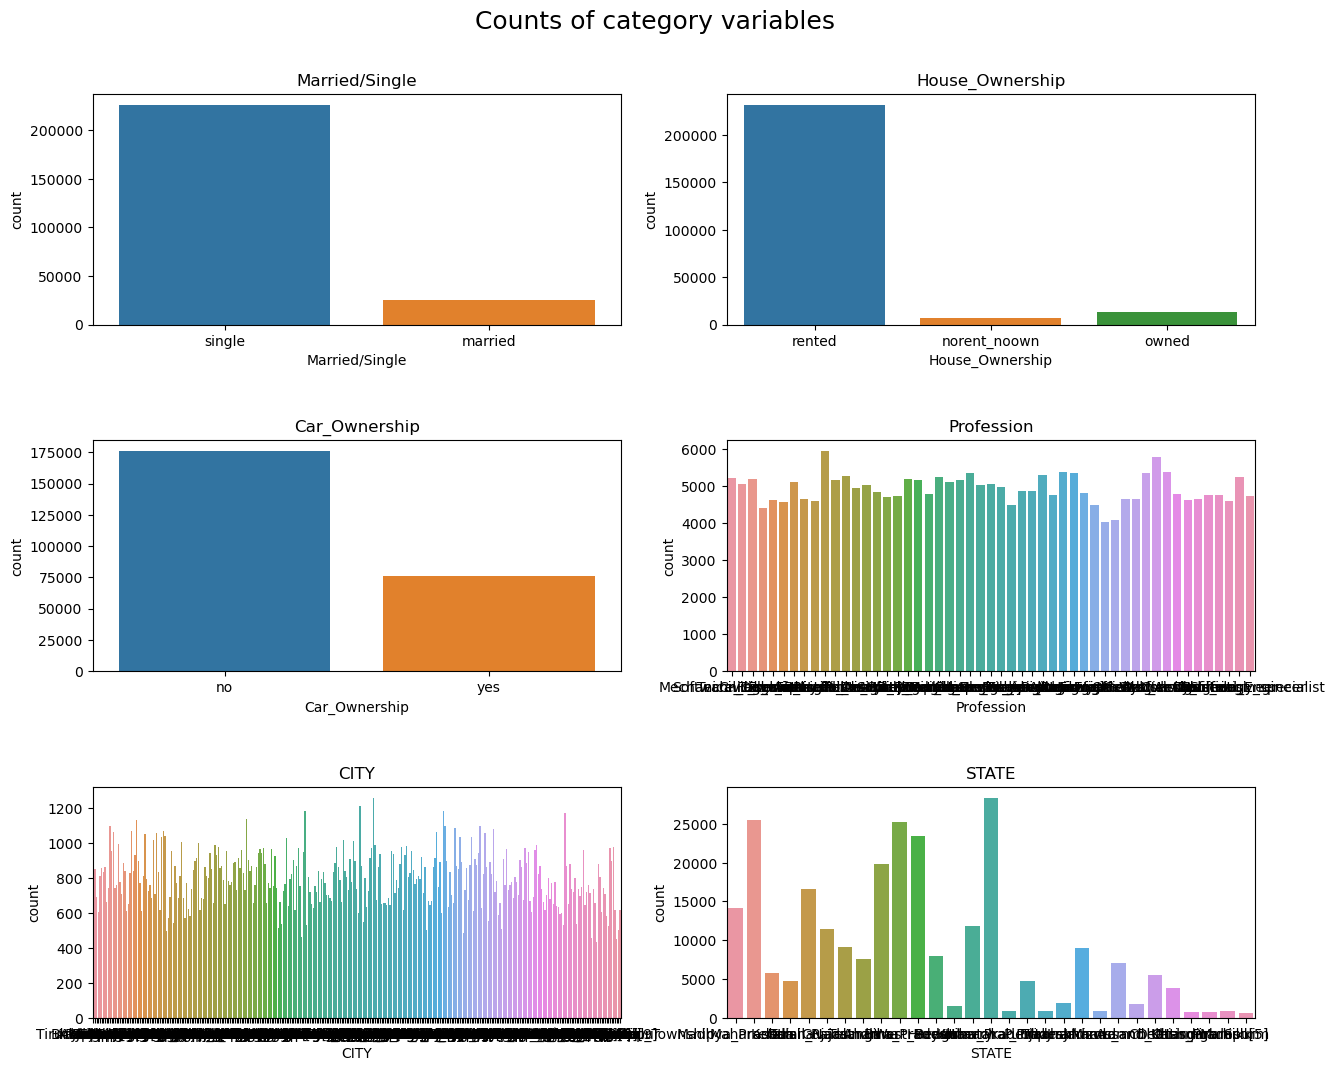

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Counts of category variables", fontsize=18, y=0.95)
 
for col , ax in zip(df_train_cat.columns , axs.ravel()):
    countplot = sns.countplot(ax = ax ,data=df_train_cat, x= col)
    countplot.set_title(col)
plt.show()

Text(0.5, 1.0, 'Risk_Flag')

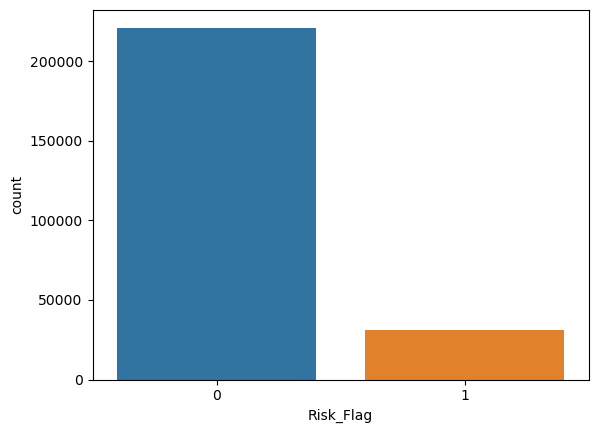

In [17]:
# Looking into target variable distribution 
fig = plt.plot( figsize=(18, 15))
sns.countplot(data=df_train,  x= 'Risk_Flag' )
countplot.set_title("Risk_Flag")

### Univariate Insights :

From the above Continous and Category univairate analysis we can observed the following traints:

Continous variables
- All the continous variable are seems to be following uniform distribution except Cureent_job_yrs where it is right skewed distribution.

Category variables
- Most individual are Single
- Most individual are currently renting 
- Less than half of the people alone own a car 
- Profession are evenly distributed across 51 professions categories
- Individuals do comes from varius state and city, however there is significant more numbers in some states or city .This can be due to demographics and economic situation , will not be in the scope of this analysis. 

Target varialbe:
- Most individuals do not default the loan


# Next Step,
Will now jump into Bivariate and Multivariate analysis and determine some of the correlations with target and assumptions of our model.

# Correlation between independent and dependent 

Here we are mostly interested on finding what is the relatinoship between the independent and dependent variables. We will be focusing on looking at the the below variables
- Income , Age , Experience , Married/single status , Car owner , Profession , Work expereience  and Current house years 

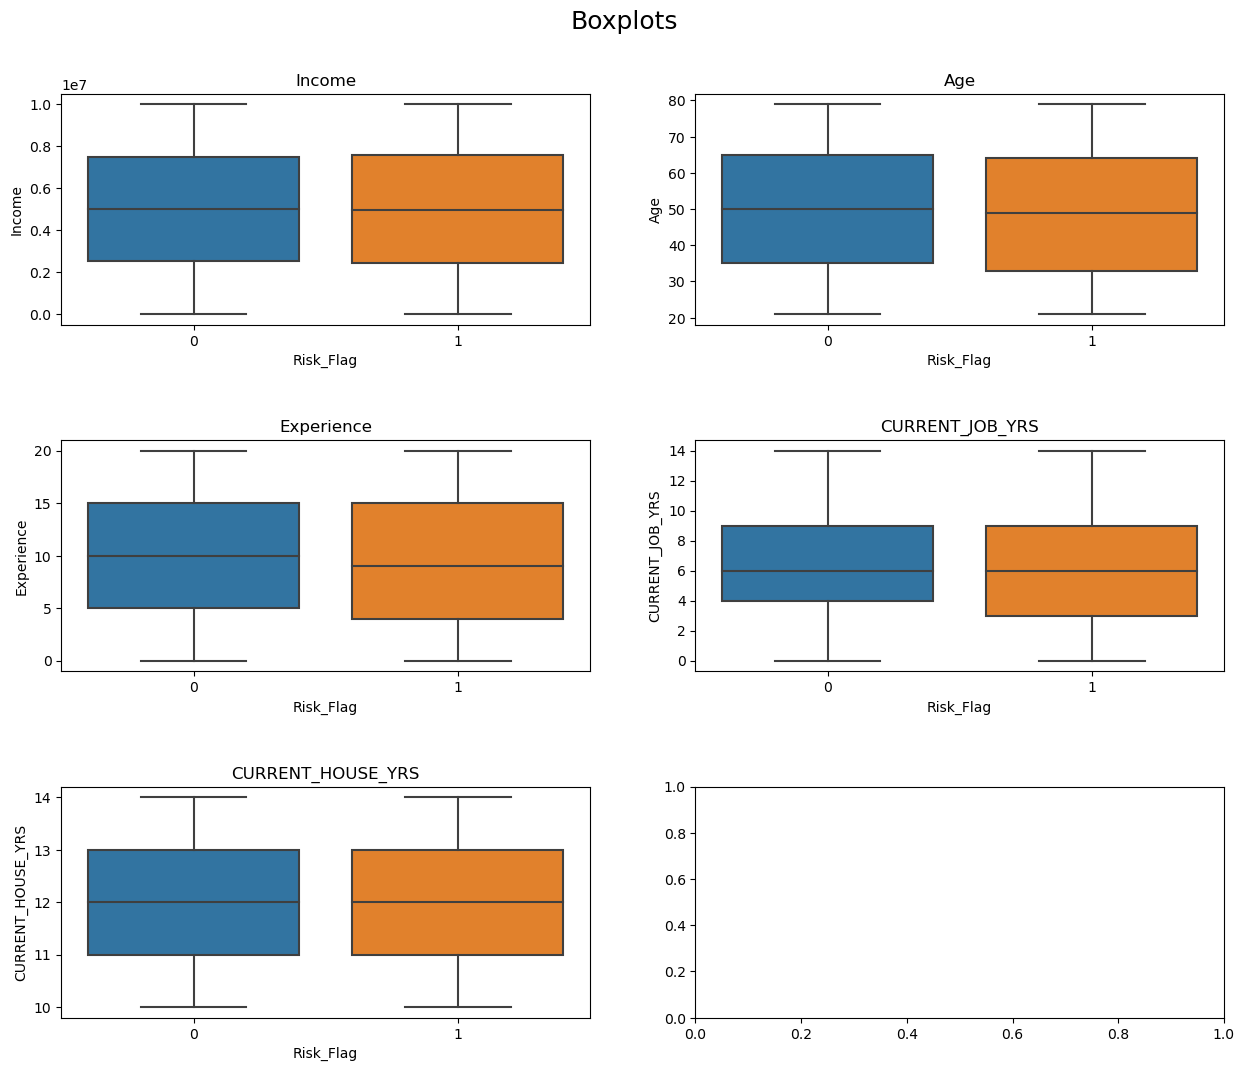

In [18]:
# Jump into Bivariate and Multivariate and determine some of the correlations and assumptions of our model

# Define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Boxplots", fontsize=18, y=0.95)

# Construct subplots
for col, ax in zip(df_train_con.columns, axs.ravel()):
    boxplot = sns.boxplot(ax=ax, data=df_train, y=col, x="Risk_Flag")
    boxplot.set_title(col)

plt.show()

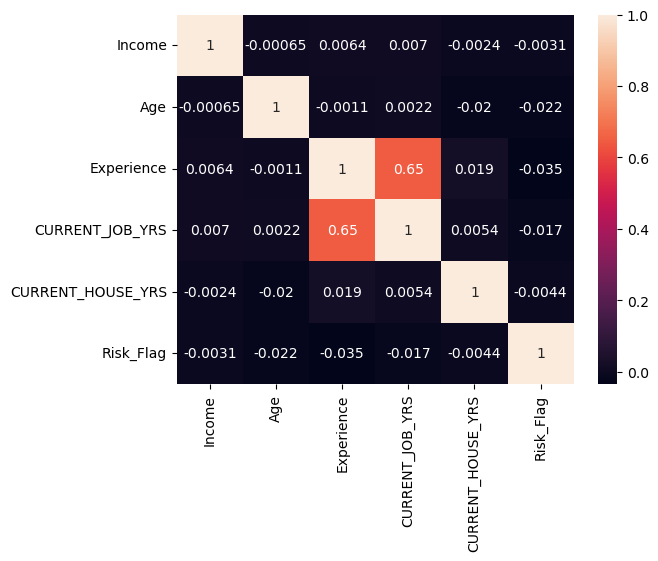

In [19]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True);
plt.show()

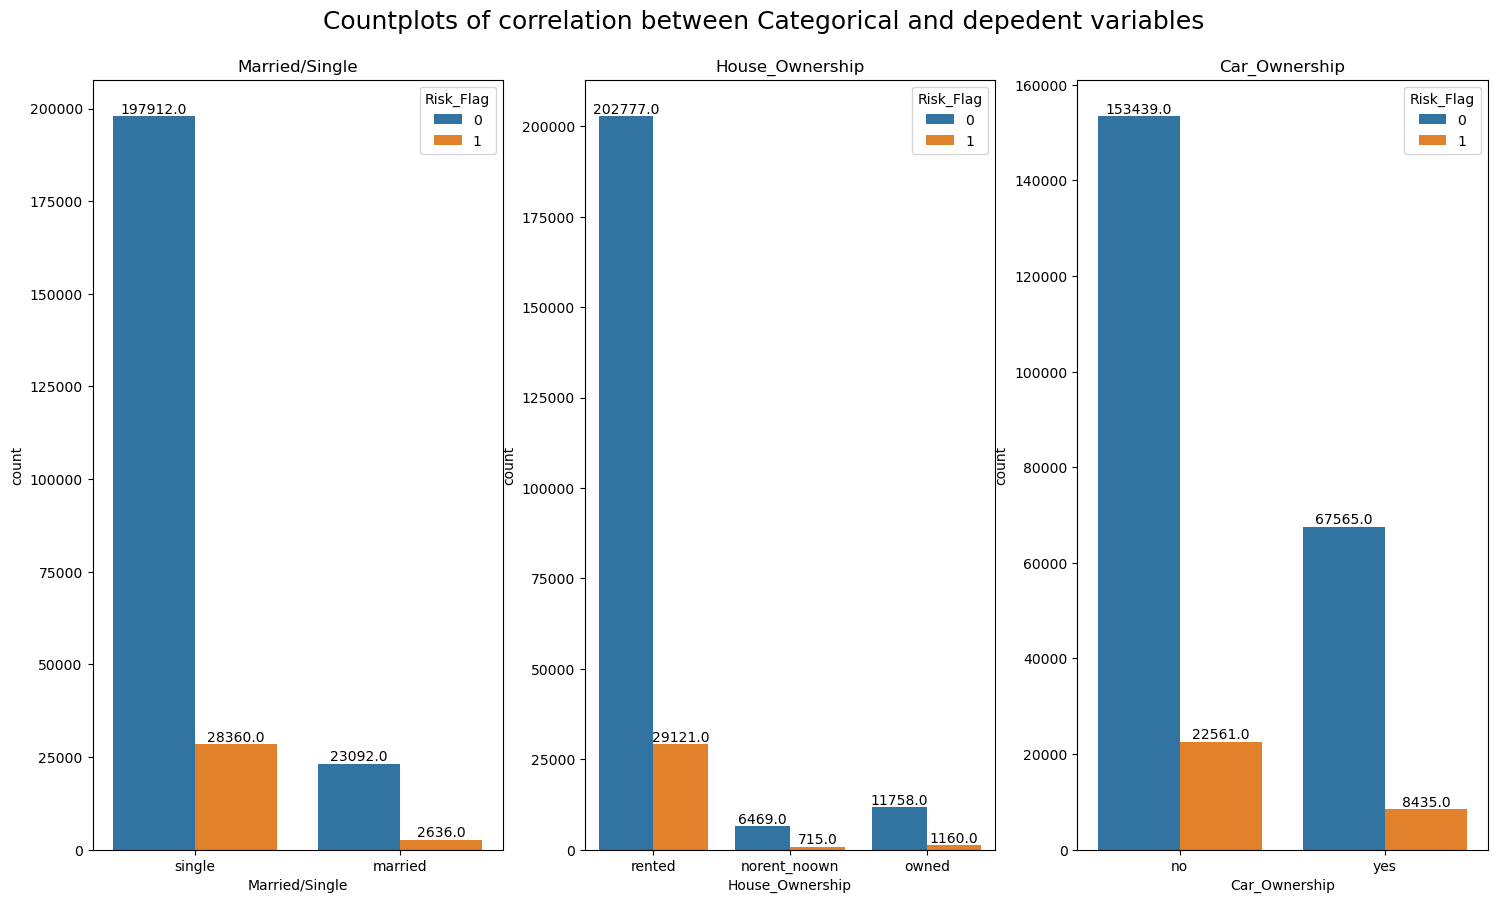

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Countplots of correlation between Categorical and depedent variables ", fontsize=18, y=0.95)

for col , ax in zip(['Married/Single', 'House_Ownership' , 'Car_Ownership'] , axs.ravel()):
    countplot = sns.countplot(ax = ax ,data = df_train, x= col  ,hue = "Risk_Flag")
    countplot.set_title(col)
    for p in countplot.patches:
        countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

### Categorical Statistical Testing 
The Chi-squared test for independence helps assess whether there is a significant association between the categorical variable "Category" and the binary target variable "Target." The chi2_contingency() function from scipy is used to calculate the test statistics and p-value. A small p-value (typically less than 0.05) indicates that the categorical variable and the target variable are associated.

In [23]:
def chi_square_test(df , col , target):
    contingency_table = pd.crosstab(df[col], df_train[target])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print("Is there a correlation between :" + col + " and " + target + "?" )
    print("Chi-squared value:", chi2)
    print("p-value:", p_value)
    if p_value <= 0.05:
        print('The variables are Dependent (reject H0)')
    else:
        print('The variables are Independent (H0 holds true)')

In [24]:
for col  in ['Profession', 'CITY', 'STATE','Married/Single', 'House_Ownership' , 'Car_Ownership']:
    chi_square_test(df_train, col , 'Risk_Flag')
    print(" ")

Is there a correlation between :Profession and Risk_Flag?
Chi-squared value: 613.4862093528226
p-value: 5.108641602000937e-98
The variables are Dependent (reject H0)
 
Is there a correlation between :CITY and Risk_Flag?
Chi-squared value: 5223.113291690215
p-value: 0.0
The variables are Dependent (reject H0)
 
Is there a correlation between :STATE and Risk_Flag?
Chi-squared value: 733.396800420077
p-value: 2.0057472384130266e-136
The variables are Dependent (reject H0)
 
Is there a correlation between :Married/Single and Risk_Flag?
Chi-squared value: 111.89204667099783
p-value: 3.773053705715196e-26
The variables are Dependent (reject H0)
 
Is there a correlation between :House_Ownership and Risk_Flag?
Chi-squared value: 182.98924138871385
p-value: 1.8381930028370595e-40
The variables are Dependent (reject H0)
 
Is there a correlation between :Car_Ownership and Risk_Flag?
Chi-squared value: 145.42374419378916
p-value: 1.7350853850183746e-33
The variables are Dependent (reject H0)
 


### Bivariate Insights

- From the chi-squared test, There is significant correlation between all the categorical variables with the target variable(Risk Flag).
- From the correlation heatmap we can see that, There is a strong correlation between Experience(total experience) and  Current_Job_Years.



### Preparation for building prediction model 

- Encoding categorical variable 
- Using SMOTETomek to balance the target variable data.



In [25]:
cols = ['Married/Single','Car_Ownership', 'House_Ownership']
le = LabelEncoder()
for col in cols:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])
df_train['Risk_Flag'] = le.fit_transform(df_train['Risk_Flag'])

In [26]:
import category_encoders as ce

high_card_features = ['Profession', 'CITY', 'STATE']
count_encoder = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe

count_encoded = count_encoder.fit_transform(df_train[high_card_features])
df_train = df_train.join(count_encoded.add_suffix("_count"))
df_train= df_train.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)

count_encode = count_encoder.fit_transform(df_test[high_card_features])
df_test = df_test.join(count_encoded.add_suffix("_count"))
df_test= df_test.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)

In [27]:
df_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_count,CITY_count,STATE_count
0,1303834,23,3,1,2,0,3,13,0,5217,798,14122
1,7574516,40,10,1,2,0,9,13,0,5053,849,25562
2,3991815,66,4,0,2,0,4,10,0,5195,688,5805
3,6256451,41,2,1,2,1,2,12,1,5053,607,4658
4,5768871,47,11,1,2,0,3,14,1,4413,809,16537
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,6,11,0,4772,1033,23483
251996,2843572,26,10,1,2,0,6,11,0,4661,798,14122
251997,4522448,46,7,1,2,0,7,12,0,4729,741,25562
251998,6507128,45,0,1,2,0,0,10,0,5166,897,1433


In [28]:
y = df_train['Risk_Flag']
X = df_train.drop(columns = ['Risk_Flag'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
y_train.value_counts()

0    176857
1     24743
Name: Risk_Flag, dtype: int64

In [31]:
smt=SMOTETomek(random_state=1)
X_train_smt,y_train_smt=smt.fit_resample(X_train,y_train)

### Building Xgboost Model and finding its best params

In [32]:
xgb_classifier = XGBClassifier(learning_rate= 0.2, max_depth= 5, n_estimators= 300, random_state=42)

# Fit the model on the training data
xgb_classifier.fit(X_train_smt, y_train_smt)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93     44147
           1       0.50      0.77      0.61      6253

    accuracy                           0.88     50400
   macro avg       0.73      0.83      0.77     50400
weighted avg       0.91      0.88      0.89     50400



In [33]:
con_mat= confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(con_mat)

Confusion Matrix:
[[39331  4816]
 [ 1436  4817]]


In [37]:
# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Create GridSearchCV object with precision as the scoring metric
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='precision')

# Fit the grid search to the training data
grid_search.fit(X_train_smt, y_train_smt)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Use the best estimator to make predictions
y_best_pred = best_estimator.predict(X_test)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}


### Fitting the whole train dataset to Xgboost Model with its best params.

- Getting the whole train data and fitting it with the Xgboost model with its best params.
- Then predicting the Rish Flag fo the test dataset which can be later loaded a file.


In [41]:
yall = df_train['Risk_Flag']
Xall = df_train.drop(columns = ['Risk_Flag'])


Xall_smt,yall_smt=smt.fit_resample(Xall,yall)

#Fitting the whole dataset df_train

xgb_classifier = XGBClassifier(learning_rate= 0.2, max_depth= 5, n_estimators= 300, random_state=42)

# Fit the model on the training data
xgb_classifier.fit(Xall_smt, yall_smt)

# Make predictions on the testing data
y_sub = xgb_classifier.predict(df_test)